![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

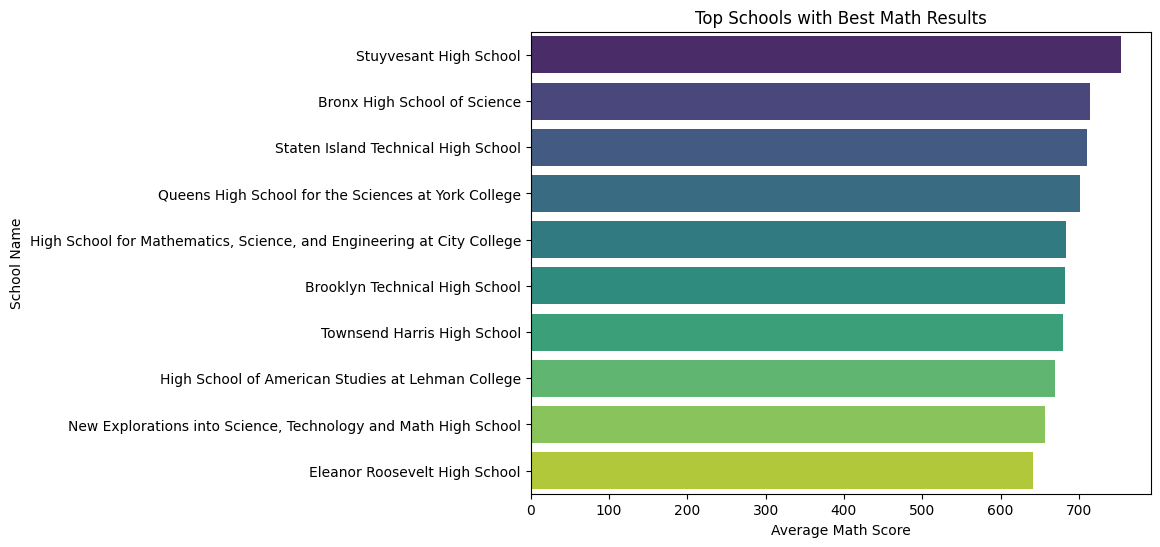

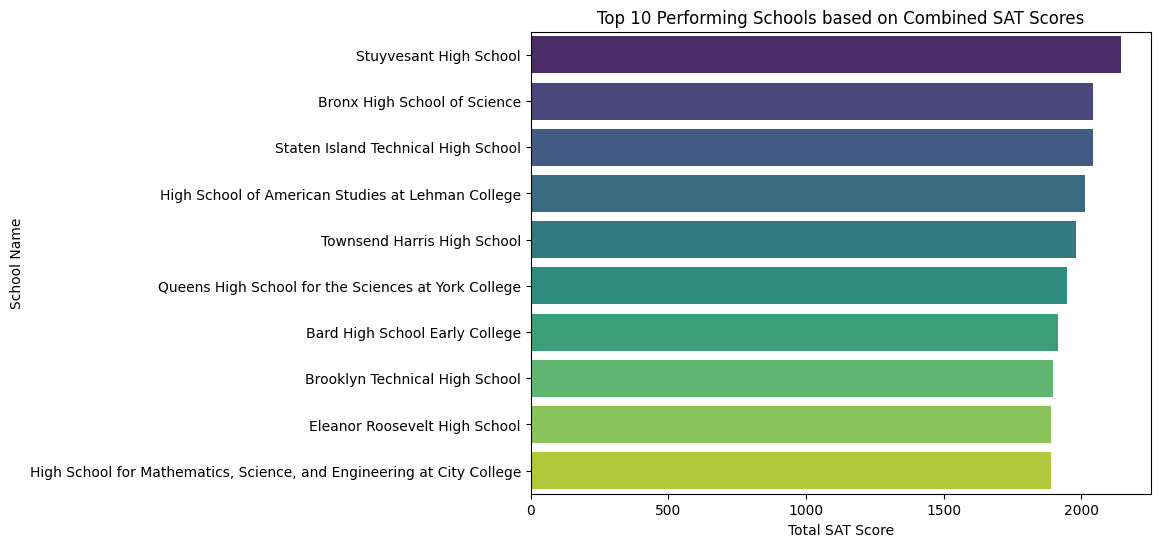

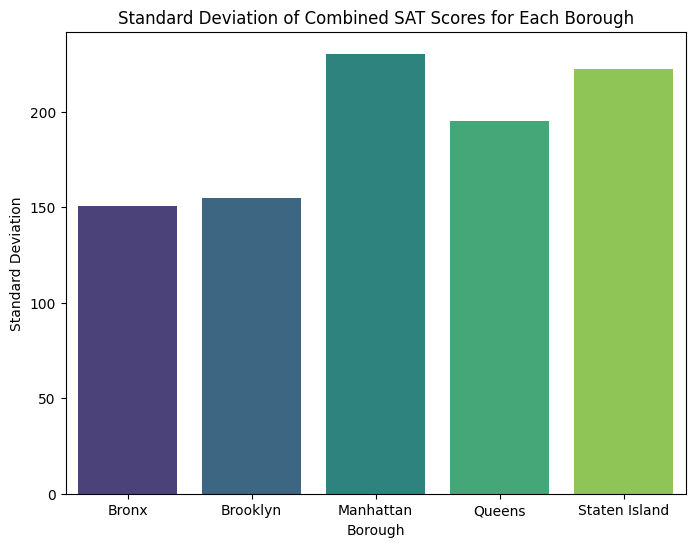

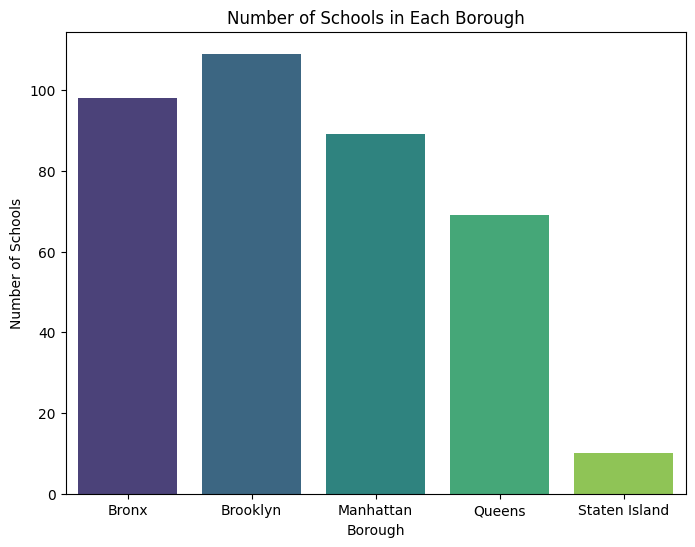

In [2]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Filter schools with average math score >= 640 (0.8 * 800)
best_math_schools = schools[schools["average_math"] >= 0.8 * 800]

# Select only the school_name and average_math columns
best_math_schools = best_math_schools[["school_name", "average_math"]]

# Sort the schools by average_math score in descending order
best_math_schools = best_math_schools.sort_values(by='average_math', ascending=False)

# Calculate the total SAT score for each school
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']

# Select the top 10 schools based on total SAT score
top_10_schools = schools[['school_name', 'total_SAT']].sort_values(by='total_SAT', ascending= False).head(10)

# Calculate the standard deviation of total SAT scores for each borough
largest_std_dev = schools.groupby("borough")["total_SAT"].agg(std='std').round(2)

# Count the number of schools in each borough
num_schools = schools.groupby("borough").size().reset_index(name='count')

# Calculate the average SAT score for each borough
average_SAT = schools.groupby("borough")["total_SAT"].agg(mean='mean').round(2)

plt.figure(figsize=(8, 6))
sns.barplot(x='average_math', y='school_name', data=best_math_schools, palette='viridis')
plt.title('Top Schools with Best Math Results')
plt.xlabel('Average Math Score')
plt.ylabel('School Name')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='total_SAT', y='school_name', data=top_10_schools, palette='viridis')
plt.title('Top 10 Performing Schools based on Combined SAT Scores')
plt.xlabel('Total SAT Score')
plt.ylabel('School Name')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=largest_std_dev.index, y='std', data=largest_std_dev.reset_index(), palette='viridis')
plt.title('Standard Deviation of Combined SAT Scores for Each Borough')
plt.xlabel('Borough')
plt.ylabel('Standard Deviation')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='borough', y='count', data=num_schools, palette='viridis')
plt.title('Number of Schools in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.show()


